In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\PC\OneDrive\Documents\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1
1999,2,81,72,15,76,30.1,0.547,25,0


In [5]:
df.shape

(2000, 9)

In [6]:
df.size

18000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [8]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.duplicated().sum()

1256

In [10]:
df1=df.copy()

# Data Cleaning

In [11]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by nan 
df_copy=df.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

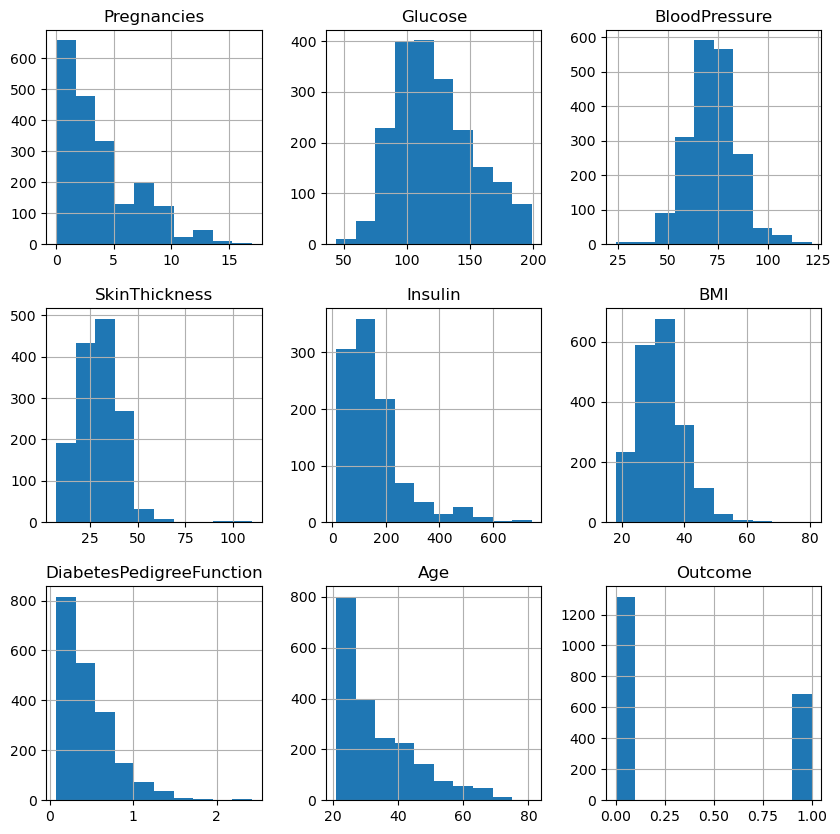

In [12]:
# To fill these nan values the data distribution needs to be understood 
# Plotting histogram of dataset before replacing nan values
p=df_copy.hist(figsize=(10,10))

In [13]:
# Replacing NaN value by mean , median depending upon distribution
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(),inplace=True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(),inplace=True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(),inplace=True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(),inplace=True)
df_copy['BMI'].fillna(df_copy['BMI'].median(),inplace=True)

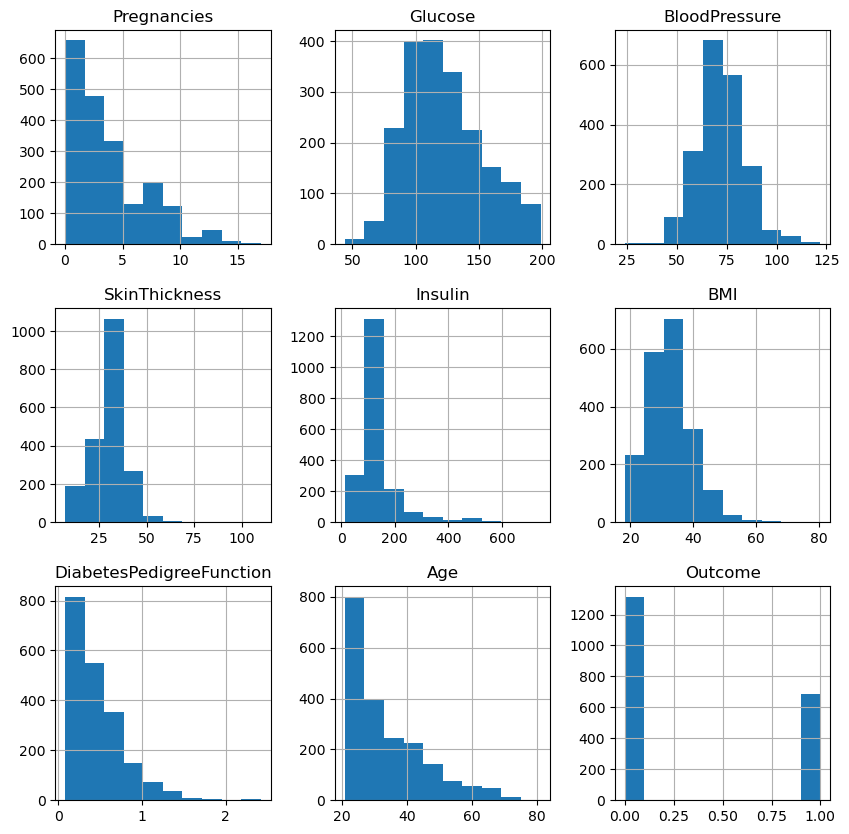

In [14]:
# plotting histogram of dataset after replacing nan values
p=df_copy.hist(figsize=(10,10))

In [15]:
df_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

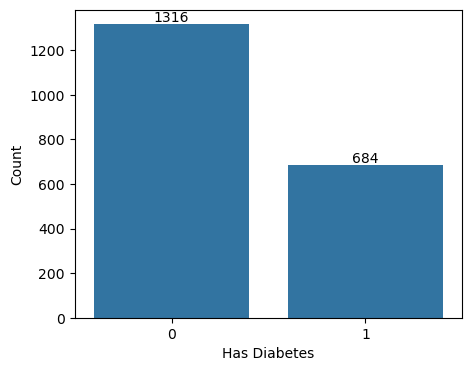

In [16]:
# plotting the outcomes based on the number of dataset entries
plt.figure(figsize=(5,4))

ax=sns.countplot(x='Outcome',data=df_copy)
for bars in ax.containers: #(for labeling numbers here 1316,684)
 ax.bar_label(bars)
plt.xlabel('Has Diabetes')
plt.ylabel('Count')
plt.show()

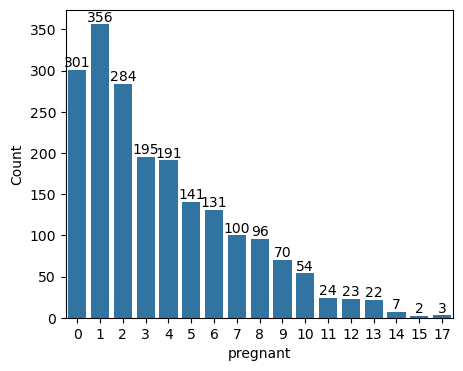

In [17]:
# plotting the outcomes based on the number of dataset entries
plt.figure(figsize=(5,4))

ax=sns.countplot(x='Pregnancies',data=df_copy)
for bars in ax.containers: #(for labeling numbers here 1316,684)
 ax.bar_label(bars)
plt.xlabel('pregnant')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Insulin vs Outcome')

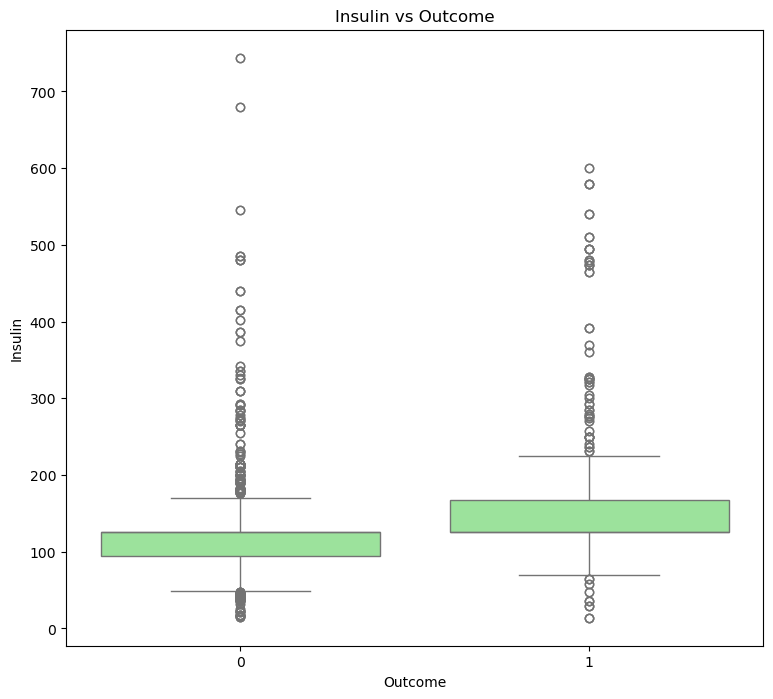

In [18]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x='Outcome',y='Insulin', color='lightgreen')
plt.title("Insulin vs Outcome")

Text(0.5, 1.0, 'Pregnancies vs Outcome')

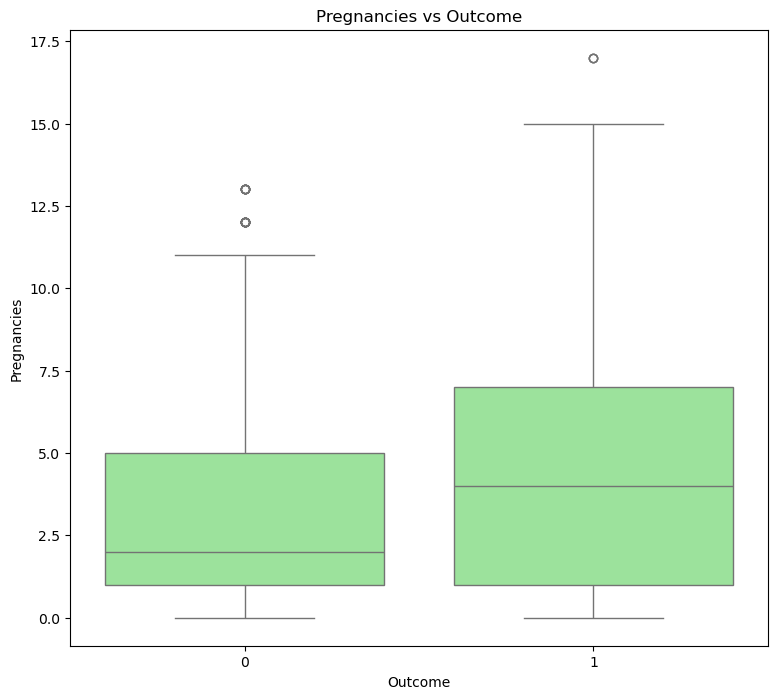

In [19]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x='Outcome',y='Pregnancies', color='lightgreen')
plt.title("Pregnancies vs Outcome")

Text(0.5, 1.0, 'Glucose vs Outcome')

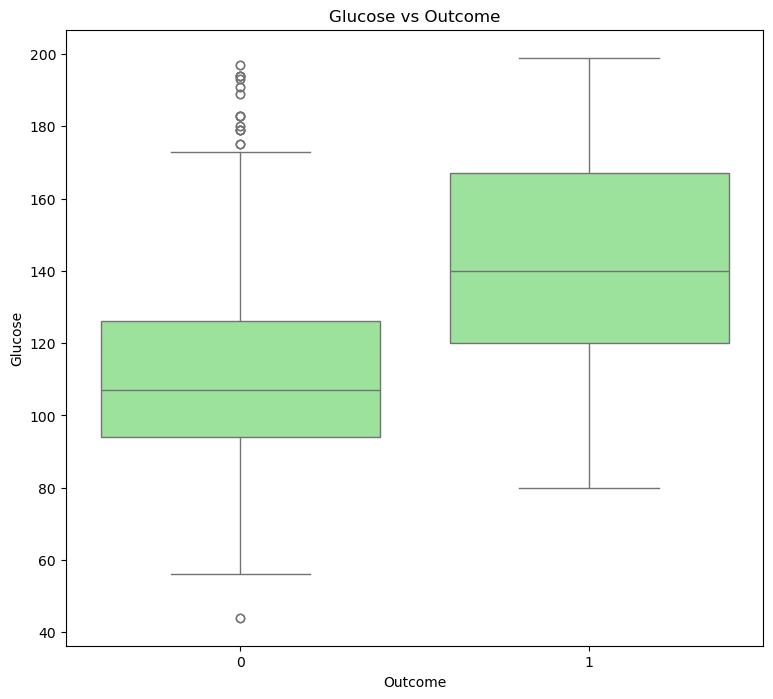

In [20]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x='Outcome',y='Glucose', color='lightgreen')
plt.title("Glucose vs Outcome")

Text(0.5, 1.0, 'BloodPressure vs Outcome')

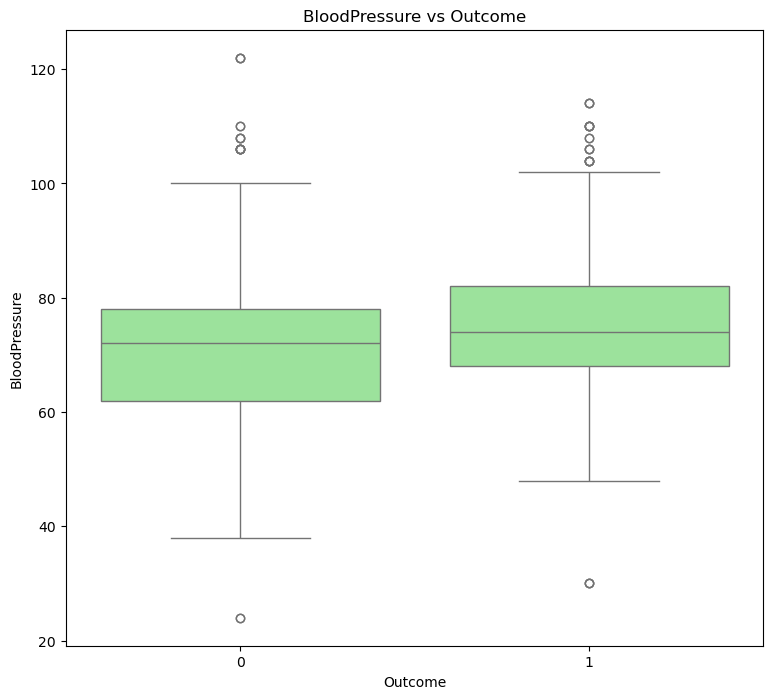

In [21]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x='Outcome',y='BloodPressure', color='lightgreen')
plt.title("BloodPressure vs Outcome")

Text(0.5, 1.0, 'SkinThickness vs Outcome')

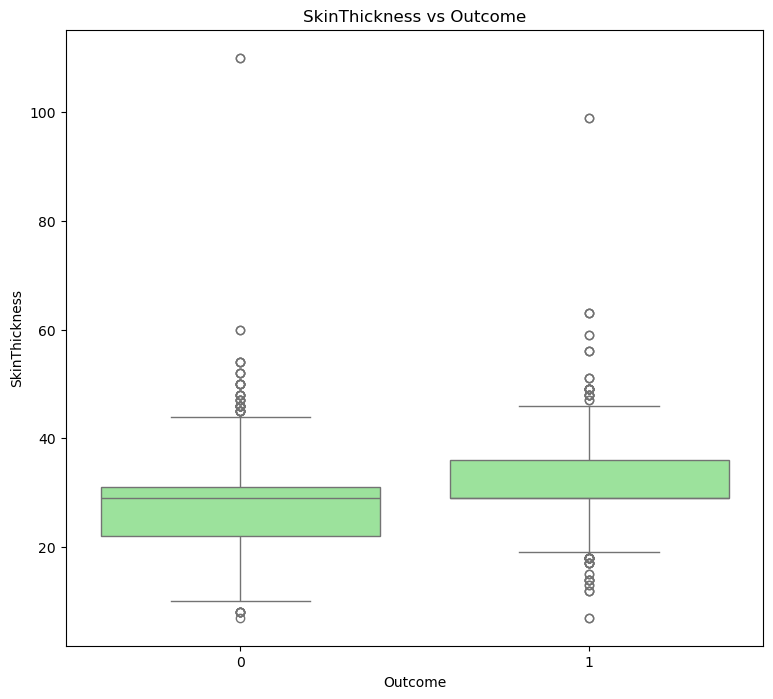

In [22]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x='Outcome',y='SkinThickness', color='lightgreen')
plt.title("SkinThickness vs Outcome")

Text(0.5, 1.0, 'Insulin vs Outcome')

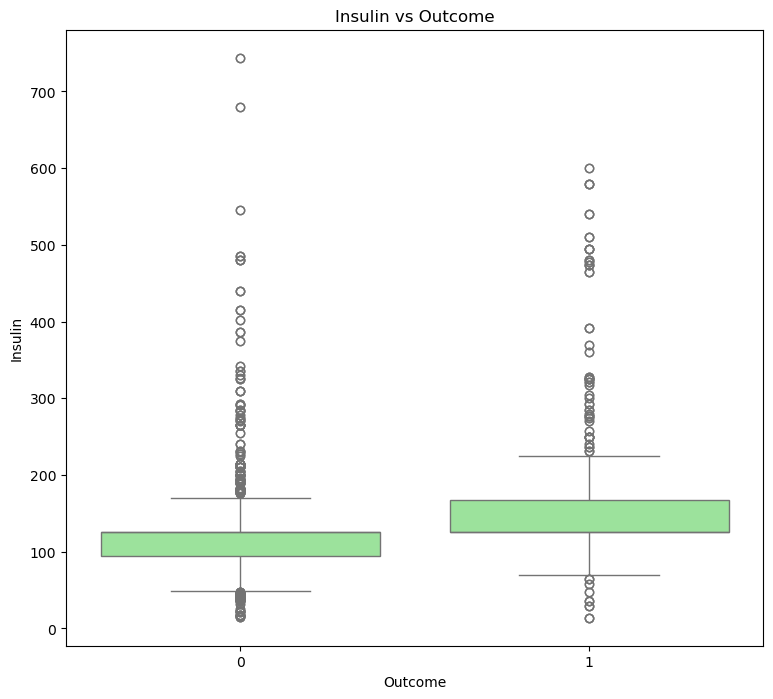

In [23]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x='Outcome',y='Insulin', color='lightgreen')
plt.title("Insulin vs Outcome")

Text(0.5, 1.0, 'BMI vs Outcome')

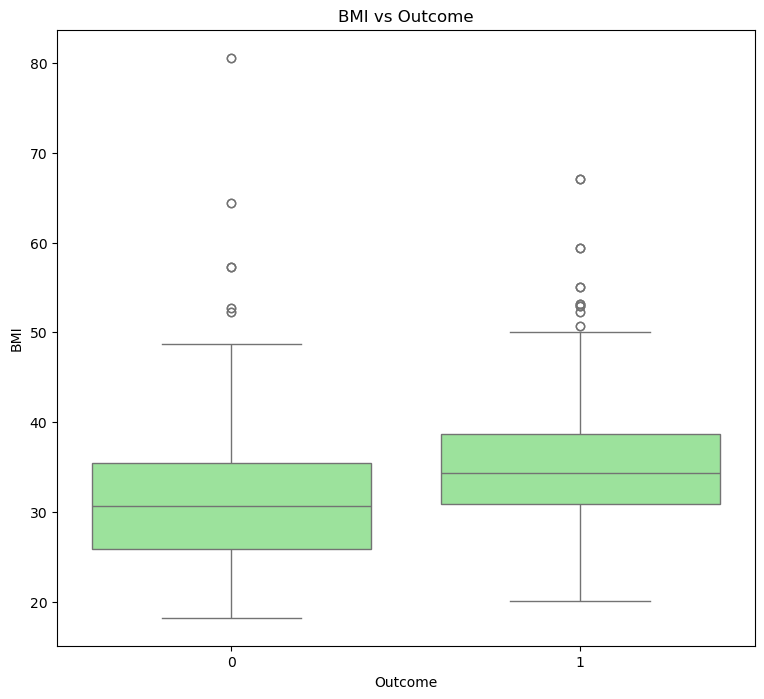

In [24]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x='Outcome',y='BMI', color='lightgreen')
plt.title("BMI vs Outcome")

Text(0.5, 1.0, 'DiabetesPedigreeFunction vs Outcome')

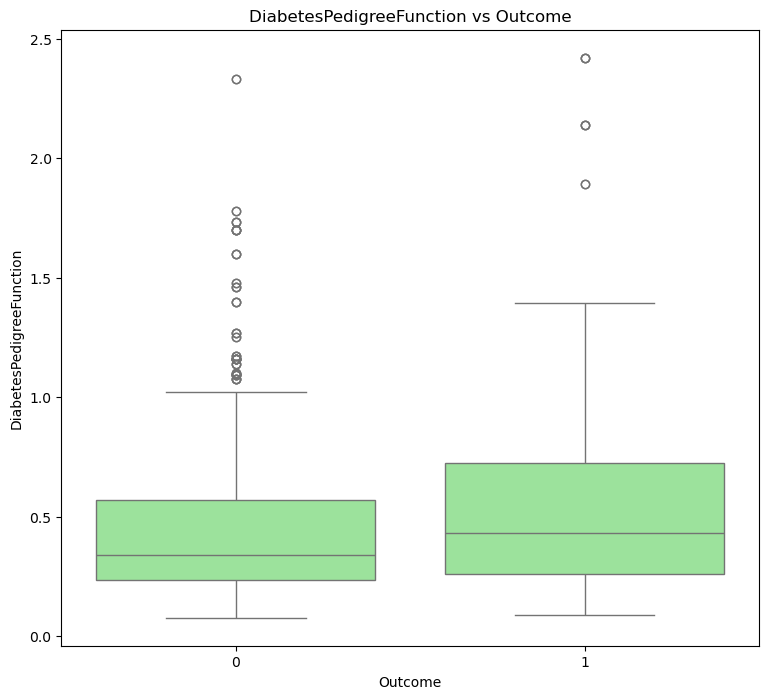

In [25]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x='Outcome',y='DiabetesPedigreeFunction', color='lightgreen')
plt.title("DiabetesPedigreeFunction vs Outcome")

Text(0.5, 1.0, 'Age vs Outcome')

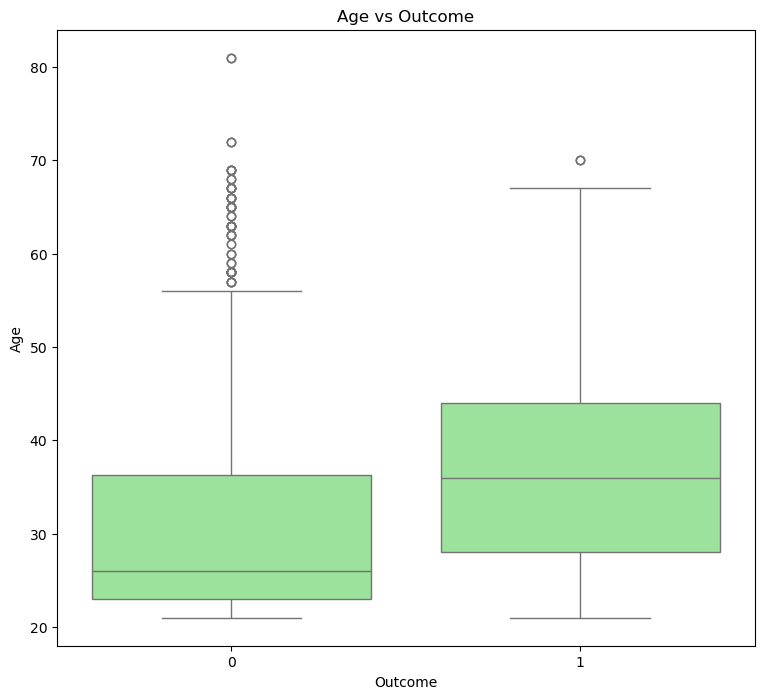

In [26]:
plt.figure(figsize=(9,8))
sns.boxplot(data=df_copy,x='Outcome',y='Age', color='lightgreen')
plt.title("Age vs Outcome")

# Model Building

In [27]:
from sklearn.model_selection import train_test_split
x=df_copy.drop(columns='Outcome')
y=df_copy['Outcome']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print('x_train size: {},x_test size: {}'.format(x_train.shape,x_test.shape))

x_train size: (1600, 8),x_test size: (400, 8)


In [28]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21
...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.0,55.0,29.7,0.370,33
1996,8,179.0,72.000000,42.0,130.0,32.7,0.719,36
1997,6,85.0,78.000000,29.0,126.0,31.2,0.382,42
1998,0,129.0,110.000000,46.0,130.0,67.1,0.319,26


In [29]:
y

0       1
1       0
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    0
1998    1
1999    0
Name: Outcome, Length: 2000, dtype: int64

In [30]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [31]:
x_train

array([[ 2.54014777, -0.03778511,  0.47339657, ..., -0.8601368 ,
        -0.65077302,  2.50732972],
       [ 4.06518958,  1.32678364, -0.03517   , ...,  1.120727  ,
         1.04381097,  1.21199837],
       [-0.81494422, -0.65509002,  0.13435219, ...,  0.92814302,
        -0.5475188 ,  0.78022125],
       ...,
       [ 0.10008087, -0.88251815, -0.71325877, ..., -0.10355688,
        -0.94838813, -0.16968841],
       [ 2.23513941, -1.20741547,  0.13435219, ..., -0.36492085,
        -0.52626057,  0.17573329],
       [ 0.40508923,  0.44956087,  0.81244096, ..., -0.04853288,
         0.50628164,  3.11181769]])

In [32]:
x_test

array([[-0.50993586,  0.02719435, -2.0694363 , ...,  1.28579898,
         0.14185498, -0.60146553],
       [-0.50993586, -0.5251311 , -1.39134754, ..., -0.51623684,
        -0.14361258, -0.94688722],
       [ 0.71009759,  2.36645507, -0.20469219, ..., -0.25487286,
        -0.44122769, -0.16968841],
       ...,
       [-0.81494422,  0.87192739, -0.37421439, ..., -0.47496884,
        -0.37745302,  0.78022125],
       [-0.50993586,  1.06686578, -1.73039192, ...,  0.81809503,
        -0.70847391, -0.68782095],
       [ 0.71009759, -0.75255922, -1.05230315, ..., -0.80511281,
         0.07200653, -0.08333298]])

In [33]:
y_test

405     0
1190    0
1132    1
731     1
1754    1
       ..
638     1
360     1
1810    1
1743    1
563     0
Name: Outcome, Length: 400, dtype: int64

In [34]:
y_train

582     0
159     1
1827    1
318     0
708     1
       ..
835     0
1216    1
1653    1
559     0
684     0
Name: Outcome, Length: 1600, dtype: int64

In [35]:
# Classifier

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [37]:
# intialize the decision tree classifier
model_dt=DecisionTreeClassifier(random_state=42)
# train the model 
model_dt.fit(x_train,y_train)
# make predictions
y_pred_dt=model_dt.predict(x_test)
# calculate performance
accuracy_dt=accuracy_score(y_test,y_pred_dt)
precision_dt=precision_score(y_test,y_pred_dt)
recall_dt=recall_score(y_test,y_pred_dt)
f1_dt=f1_score(y_test,y_pred_dt)
conf_matrix_dt=confusion_matrix(y_test,y_pred_dt)
class_report_dt=classification_report(y_test,y_pred_dt)

# print the performance metrics for Decision Tree
print('Decision Tree Metrics:')
print('Accuracy:',round(accuracy_dt,2))
print('Precision:',round(precision_dt,2))
print('Recall:',round(recall_dt,2))
print('F1-Score:',round(f1_dt,2))
print('Confusion Matrix:\n',conf_matrix_dt)
print('Classification Report:\n',class_report_dt)

Decision Tree Metrics:
Accuracy: 0.99
Precision: 0.98
Recall: 0.98
F1-Score: 0.98
Confusion Matrix:
 [[270   2]
 [  2 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       272
           1       0.98      0.98      0.98       128

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(x_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(x_test)

# Calculate performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the performance metrics for Random Forest
print('Random Forest Metrics:')
print('Accuracy:', round(accuracy_rf, 2))
print('Precision:', round(precision_rf, 2))
print('Recall:', round(recall_rf, 2))
print('F1-Score:', round(f1_rf, 2))
print('Confusion Matrix:\n', conf_matrix_rf)
print('Classification Report:\n', class_report_rf)

Random Forest Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 0.98
F1-Score: 0.99
Confusion Matrix:
 [[272   0]
 [  2 126]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       272
           1       1.00      0.98      0.99       128

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



In [39]:
from sklearn.svm import SVC

# Initialize 
model_svm = SVC( random_state=42)

# Train the model
model_svm.fit(x_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(x_test)

# Calculate performance metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Print the performance metrics
print('SVM Metrics:')
print('Accuracy:', round(accuracy_svm, 2))
print('Precision:', round(precision_svm, 2))
print('Recall:', round(recall_svm, 2))
print('F1-Score:', round(f1_svm, 2))
print('Confusion Matrix:\n', conf_matrix_svm)
print('Classification Report:\n', class_report_svm)

SVM Metrics:
Accuracy: 0.84
Precision: 0.82
Recall: 0.66
F1-Score: 0.73
Confusion Matrix:
 [[253  19]
 [ 43  85]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       272
           1       0.82      0.66      0.73       128

    accuracy                           0.84       400
   macro avg       0.84      0.80      0.81       400
weighted avg       0.84      0.84      0.84       400



# Cross validation

In [40]:
from sklearn.model_selection import ShuffleSplit,cross_val_score
model_dt=DecisionTreeClassifier(random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)

results_dt=cross_val_score(model_dt,x,y,cv=ssplit)
print('Decision Tree Cross-validation Results:',results_dt)
print("Mean Accuracy:",np.mean(results_dt))

Decision Tree Cross-validation Results: [0.94666667 0.96       0.95666667 0.95       0.96666667 0.95
 0.97666667 0.95       0.965      0.935     ]
Mean Accuracy: 0.9556666666666667


In [41]:
model_rf=RandomForestClassifier(n_estimators=100,random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)

results_rf=cross_val_score(model_rf,x,y,cv=ssplit)
print(results_rf)
print("Mean Accuracy:",np.mean(results_rf))

[0.94833333 0.95833333 0.98       0.97       0.98       0.95
 0.985      0.975      0.95       0.945     ]
Mean Accuracy: 0.9641666666666666


In [42]:
model_svm=SVC(random_state=42)
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
# perform cross-validation
results_svm=cross_val_score(model_svm,x,y,cv=ssplit)
#print results
print('SVM Cross-validation Results:',results_svm)
print('Mean Accuracy:',np.mean(results_svm))

SVM Cross-validation Results: [0.78166667 0.755      0.77333333 0.77833333 0.765      0.77
 0.76833333 0.76166667 0.77166667 0.76166667]
Mean Accuracy: 0.7686666666666667


# Prediction

In [43]:
import pickle
from sklearn.tree import DecisionTreeClassifier
# example: train a model(decision tree classifier as an example)
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)

#save the trained model to a file using pickel
with open('diabetes_model.pkl','wb')as file:#wb write in binary mode
    pickle.dump(model_dt,file)
    print("Model saved successfully.")

Model saved successfully.


In [44]:
with open('sc.pkl','wb')as scaler_file:
    pickle.dump(sc,scaler_file)

In [45]:
import tkinter as tk
import pickle
import numpy as np

# Load the trained Random Forest model
with open('diabetes_model.pkl', 'rb') as model_file:#rb read in binary mode
    model = pickle.load(model_file)

# Load the scaler used during training
with open('sc.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create Tkinter GUI
root = tk.Tk()
root.title("Diabetes Prediction")

# Function to get prediction from input fields
def get_prediction():
    # Get input values from entry fields
    Pregnancies = float(pregnancies_entry.get())
    Glucose = float(glucose_entry.get())
    BloodPressure = float(blood_pressure_entry.get())
    Skinthickness = float(skin_thickness_entry.get())
    Insulin = float(insulin_entry.get())
    Bmi = float(bmi_entry.get())
    Dpf = float(dpf_entry.get())
    Age = float(age_entry.get())

    # Create a numpy array with input values
    input_data = np.array([[Pregnancies,Glucose,BloodPressure,Skinthickness,Insulin,Bmi,Dpf,Age]])

    # Normalize the input data using the scaler
    input_data_scaled = scaler.transform(input_data)

    # Predict using the loaded model
    prediction = model.predict(input_data_scaled)

    # Display prediction result
    if prediction[0] == 1:
        result_label.config(text="Prediction: You have Diabetes.")
    else:
        result_label.config(text="Prediction: You do not have Diabetes.")

# Create labels and entry fields for input features
tk.Label(root, text="Pregnancies").grid(row=0, column=0)
tk.Label(root, text="Glucose").grid(row=1, column=0)
tk.Label(root, text="Blood Pressure").grid(row=2, column=0)
tk.Label(root, text="Skin Thickness").grid(row=3, column=0)
tk.Label(root, text="Insulin").grid(row=4, column=0)
tk.Label(root, text="BMI").grid(row=5, column=0)
tk.Label(root, text="DPF").grid(row=6, column=0)
tk.Label(root, text="Age").grid(row=7, column=0)

pregnancies_entry = tk.Entry(root)
glucose_entry = tk.Entry(root)
blood_pressure_entry = tk.Entry(root)
skin_thickness_entry = tk.Entry(root)
insulin_entry = tk.Entry(root)
bmi_entry = tk.Entry(root)
dpf_entry = tk.Entry(root)
age_entry = tk.Entry(root)

pregnancies_entry.grid(row=0, column=1)
glucose_entry.grid(row=1, column=1)
blood_pressure_entry.grid(row=2, column=1)
skin_thickness_entry.grid(row=3, column=1)
insulin_entry.grid(row=4, column=1)
bmi_entry.grid(row=5, column=1)
dpf_entry.grid(row=6, column=1)
age_entry.grid(row=7, column=1)

# Button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=get_prediction)
predict_button.grid(row=8, columnspan=2)

# Label to display prediction result
result_label = tk.Label(root, text="")
result_label.grid(row=9, columnspan=2)

root.mainloop()

In [63]:
# Define the content of the updated Streamlit script
streamlit_code = """
import streamlit as st
import pickle
import numpy as np

# Load the trained DecisionTreeClassifier model and scaler
with open('diabetes_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('sc.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Create the web app
st.title('Diabetes Prediction App')

# Input fields
pregnancies = st.number_input('Pregnancies', min_value=0,value=0)
glucose = st.number_input('Glucose',  min_value=0.0,value=0.0)
blood_pressure = st.number_input('Blood_pressure', min_value=0.0, value=0.0)  
skin_thickness = st.number_input('Skin_thickness', min_value=0.0,value=0.0)
insulin = st.number_input('Insulin',  min_value=0.0,value=0.0)
bmi = st.number_input('Bmi', min_value=0.0, value=0.0) 
diabetesPedigreeFunction = st.number_input('DiabetesPedigreeFunction',  min_value=0.0,value=0.0)
age = st.number_input('Age', min_value=0, max_value=100, value=0) 


# Prepare the feature vector
features = np.array([[age, pregnancies, glucose,blood_pressure,skin_thickness,insulin,bmi,diabetesPedigreeFunction]], dtype=np.float64)

# Scale the features
features_scaled = scaler.transform(features)

# Predict diabetes
predicted_diabetes = model.predict(features_scaled)

# Display the result
if st.button('Predict'):
    if predicted_diabetes[0] == 1:
        st.write("Prediction: You have Diabetes.")
    else:
        st.write("Prediction: You do not have Diabetes.")
"""

# Specify the file path where the hrapp.py file will be saved
file_path = 'drapp.py'

# Write the content to the file
with open(file_path, 'w') as file:
    file.write(streamlit_code)

print(f"File '{file_path}' has been saved.")

File 'drapp.py' has been saved.
